CIND 820- Big Data Analytics Project

Using Machine Learning for Prediction of Early Readmission of Diabetic Patients

Supervised by: Ceni Babaoglu

Presented by: Nehal Gamal Mohamed (501278190)


In [ ]:
!pip install pandas
import sys
!pip install matplotlib
!pip install graphviz

In [ ]:
#importing necessary libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Uploading diabetic_data csv file
from google.colab import files
data = files.upload()
#Instintiating DataReader class
class DataReader:
    def read_csv(self, filename):
        df = pd.read_csv(filename)
        return df

filename = next(iter(data))
data_reader = DataReader()
df = data_reader.read_csv(filename)
#Displaying the first 10 records of the dataset
print(df.head(10))


Saving diabetic_data (version 1).csv to diabetic_data (version 1) (1).csv
   encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                    

In [ ]:
#Displaying variables data types
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-n

In [ ]:
#Defining lists for categorical variables and numeric variables
categorical_columns = [
    'race',
    'gender',
    'age',
    'weight',
    'payer_code',
    'medical_specialty',
    'diag_1',
    'diag_2',
    'diag_3',
    'max_glu_serum',
    'A1Cresult',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'insulin',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone',
    'change',
    'diabetesMed',
    'readmitted'
]

numeric_columns = [
    'encounter_id',
    'patient_nbr',
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id',
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses'
]


In [ ]:
#Dataset Description
print("Dataset Description:")
print(df.describe(include='all'))

Dataset Description:
        encounter_id   patient_nbr       race  gender      age  weight  \
count   1.017660e+05  1.017660e+05     101766  101766   101766  101766   
unique           NaN           NaN          6       3       10      10   
top              NaN           NaN  Caucasian  Female  [70-80)       ?   
freq             NaN           NaN      76099   54708    26068   98569   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN     NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN     NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN     NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN     NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN     NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN     NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN     NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count       10

In [ ]:
#Converted blank and "?" to NaN to represent missing values
# Replace '?' and blank cells with NaN
df.replace({'?': pd.NA, '': pd.NA}, inplace=True)

# Replaced 'None' in 'max_glu_serum' and 'A1Cresult' to be seen as 'No Test' category and not as missing values
df['max_glu_serum'].replace({pd.NA: 'No Test', 'None': 'No Test'}, inplace=True)
df['A1Cresult'].replace({pd.NA: 'No Test', 'None': 'No Test'}, inplace=True)
missing_values = df.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepi

In [ ]:
# converting numeric columns to numeric data types and categorical columns to category data type
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
print(df.dtypes)
print(df[numeric_columns].dtypes)


encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id            int64
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

In [ ]:
# Handle missing values by replacing with mode
for column in ['race', 'diag_1', 'diag_2', 'diag_3']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify changes
print(df.isnull().sum())


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
#Checking for duplicate records
duplicate_records = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")

Number of duplicate records: 0


In [ ]:
# Drop unnecessary columns
df.drop(columns=['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], inplace=True)

# Verify the remaining columns
print("Remaining columns after dropping unnecessary ones:")
print(df.columns)

Remaining columns after dropping unnecessary ones:
Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
# Simplify and categorize diag_1, diag_2, diag_3
def simplify_diag(x):
    if pd.isna(x):
        return -1
    if 'V' in x or 'E' in x:
        return 0
    try:
        return int(x[:3])
    except:
        return -1

df['diag_1'] = df['diag_1'].apply(simplify_diag)
df['diag_2'] = df['diag_2'].apply(simplify_diag)
df['diag_3'] = df['diag_3'].apply(simplify_diag)

# Verify changes
print(df[['diag_1', 'diag_2', 'diag_3']].head())

   diag_1  diag_2  diag_3
0     250     276     250
1     276     250     255
2     648     250       0
3       8     250     403
4     197     157     250


In [ ]:
# Combine 'NO' and '>30' categories into a single '>30' category
df['readmitted'] = df['readmitted'].replace({'NO': '>30', '>30': '>30', '<30': '<30'})

# Verify changes
print(df['readmitted'].value_counts())


readmitted
>30    90409
<30    11357
Name: count, dtype: int64


In [ ]:
# Here I dropped the List of columns dominated by "No" category since they have very low variance and no added value
columns_dominated_by_no = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]
df.drop(columns=columns_dominated_by_no, inplace=True)

# Check the remaining columns
print("Remaining columns after dropping unnecessary ones:")
print(df.columns)
print(df.info())

Remaining columns after dropping unnecessary ones:
Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'miglitol', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      101766 non-null  category
 1   gender                    101766 non-null  category
 2   age                       101766 non-null  category
 3   admission_type_id         101766 non-null  int64   
 4   discharge_disposition_id  101766 non-null  int6

In [ ]:
# Ensure that 'admission_type_id', 'discharge_disposition_id', 'admission_source_id' are treated as categorical
df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']] = df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype(str)

# List of categorical features
categorical_features = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'miglitol', 'insulin', 'change', 'diabetesMed',
                        'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# Convert all categorical columns to strings
df[categorical_features] = df[categorical_features].astype(str)

# Verify conversion
print(df[categorical_features].dtypes)

race                        object
gender                      object
age                         object
max_glu_serum               object
A1Cresult                   object
miglitol                    object
insulin                     object
change                      object
diabetesMed                 object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
dtype: object


In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Verify the changes
print(df.head())
print(df.info())

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  \
0                  0                 0                 0     250     276   
1                  0                 0                 0     276     250   
2                  2                 0                 1     648     250   
3                  0                 0                 0       8     250   
4                  0                 0                 0     197     157   

   diag_3  ...  admission_source_id_20 admission_source_id_22  \
0     250  ...       

In [ ]:
# Convert boolean columns to integer
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# Verify the changes
print(df.head())
print(df.info())

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  \
0                  0                 0                 0     250     276   
1                  0                 0                 0     276     250   
2                  2                 0                 1     648     250   
3                  0                 0                 0       8     250   
4                  0                 0                 0     197     157   

   diag_3  ...  admission_source_id_20 admission_source_id_22  \
0     250  ...       

In [ ]:
# Convert the target variable 'readmitted' into binary (1 for '<30', 0 for '>30')
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [ ]:
# To assess the normality of the numerical variables, I conducted the Shapiro-Wilk test.
# Despite the test results indicating that none of the variables followed a normal distribution,
# I chose to retain the outliers. The reason behind this decision was that the count of outliers
# across the numeric variables was not substantial, and removing them could potentially reduce
# the variance and valuable information in the dataset.
from scipy.stats import shapiro

# Copy the DataFrame to avoid modifying the original
df_clustering = df.copy()

# List of numeric columns
numeric_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                   'number_outpatient', 'number_emergency', 'number_inpatient',
                   'diag_1', 'diag_2', 'diag_3']

# Dropping the class label 'readmitted' for Shapiro-Wilk test
data_for_shapiro = df_clustering[numeric_columns]

# Run Shapiro-Wilk test on numeric columns to check for normality
shapiro_results = {}
for column in numeric_columns:
    stat, p = shapiro(data_for_shapiro[column])
    shapiro_results[column] = {'statistic': stat, 'p_value': p}

# Display Shapiro-Wilk test results
print("Shapiro-Wilk Test Results:")
for column, result in shapiro_results.items():
    print(f"Column: {column}, Statistic: {result['statistic']}, p-value: {result['p_value']}")





Shapiro-Wilk Test Results:
Column: time_in_hospital, Statistic: 0.8869192600250244, p-value: 0.0
Column: num_lab_procedures, Statistic: 0.9848576188087463, p-value: 0.0
Column: num_procedures, Statistic: 0.7742846012115479, p-value: 0.0
Column: num_medications, Statistic: 0.9244745969772339, p-value: 0.0
Column: number_outpatient, Statistic: 0.3123285174369812, p-value: 0.0
Column: number_emergency, Statistic: 0.19770395755767822, p-value: 0.0
Column: number_inpatient, Statistic: 0.5557276010513306, p-value: 0.0
Column: diag_1, Statistic: 0.9683600068092346, p-value: 0.0
Column: diag_2, Statistic: 0.9584629535675049, p-value: 0.0
Column: diag_3, Statistic: 0.9462312459945679, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize numeric columns
scaler = StandardScaler()
df_clustering[numeric_columns] = scaler.fit_transform(df_clustering[numeric_columns])

# Verify normalization
print("Normalized Data:")
print(pd.DataFrame(df_clustering[numeric_columns], columns=numeric_columns).describe())



Normalized Data:
       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      1.017660e+05        1.017660e+05    1.017660e+05     1.017660e+05   
mean       5.082986e-17        1.111554e-16   -1.717602e-17    -1.323811e-16   
std        1.000005e+00        1.000005e+00    1.000005e+00     1.000005e+00   
min       -1.137649e+00       -2.139630e+00   -7.853977e-01    -1.848268e+00   
25%       -8.026506e-01       -6.147950e-01   -7.853977e-01    -7.409197e-01   
50%       -1.326548e-01        4.596660e-02   -1.991621e-01    -1.257264e-01   
75%        5.373411e-01        7.067282e-01    3.870736e-01     4.894670e-01   
max        3.217324e+00        4.518815e+00    2.732016e+00     7.994826e+00   

       number_outpatient  number_emergency  number_inpatient        diag_1  \
count       1.017660e+05      1.017660e+05      1.017660e+05  1.017660e+05   
mean        2.010851e-17      3.044206e-17     -2.115583e-17 -1.273365e-16   
std         1.000005e+00    

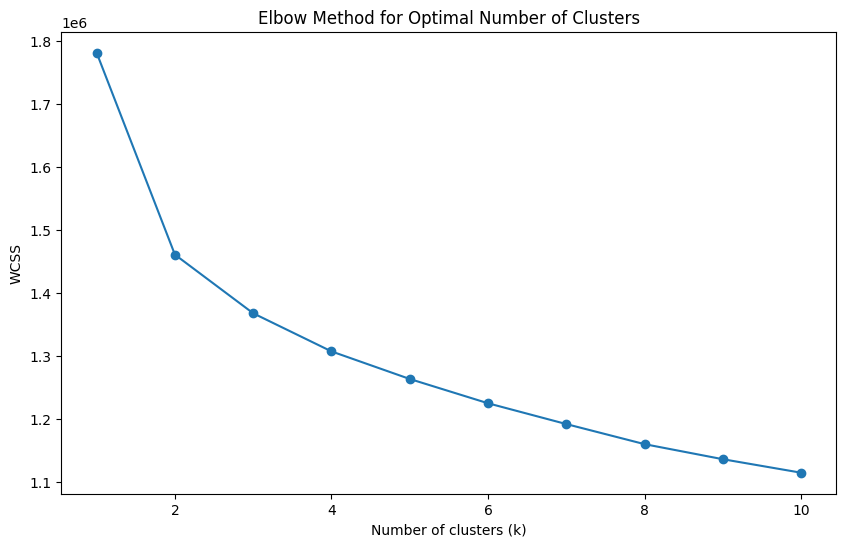

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the data for clustering (excluding the 'readmitted' column)
clustering_data = df_clustering.drop(columns=['readmitted'])

# Calculate WCSS for different numbers of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

# Visualize the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()



In [ ]:
# Verify that clustering_data contains all the columns
print("Columns in clustering_data:")
print(clustering_data.columns)
# Get the count of columns
column_count = len(clustering_data.columns)
print(f"Number of columns in clustering_data: {column_count}")

Columns in clustering_data:
Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_Male', 'gender_Unknown/Invalid', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'max_glu_serum_>300',
       'max_glu_serum_No Test', 'max_glu_serum_Norm', 'A1Cresult_>8',
       'A1Cresult_No Test', 'A1Cresult_Norm', 'miglitol_No', 'miglitol_Steady',
       'miglitol_Up', 'insulin_No', 'insulin_Steady', 'insulin_Up',
       'change_No', 'diabetesMed_Yes', 'admission_type_id_2',
       'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5',
       'admission_type_id_6', 'admission_type_id_7', 'admission_type_id_8',
       'discharge_disposition_id_10', '

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Perform K-Means clustering with the optimal number of clusters (K=4)
optimal_clusters = 4  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, random_state=42)
kmeans.fit(clustering_data)

# Add the cluster labels to the DataFrame
df_clustering['Cluster'] = kmeans.labels_

# Print the DataFrame after adding the cluster labels
print(df_clustering)

# Calculate the silhouette score to evaluate the clustering performance
silhouette_avg = silhouette_score(clustering_data, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0              -1.137649           -0.106517       -0.785398        -1.848268   
1              -0.467653            0.808384       -0.785398         0.243390   
2              -0.802651           -1.631351        2.145781        -0.371804   
3              -0.802651            0.045967       -0.199162        -0.002688   
4              -1.137649            0.401761       -0.785398        -0.986997   
...                  ...                 ...             ...              ...   
101761         -0.467653            0.401761       -0.785398        -0.002688   
101762          0.202343           -0.513139        0.973309         0.243390   
101763         -1.137649            0.503417       -0.785398        -0.863958   
101764          1.877333            0.096794        0.387074         0.612506   
101765          0.537341           -1.529696        0.973309        -1.602190   

        number_outpatient  

For n_clusters = 2, Silhouette Score = 0.18104549510866558
For n_clusters = 3, Silhouette Score = 0.12956704345897635
For n_clusters = 4, Silhouette Score = 0.12615024043888765
For n_clusters = 5, Silhouette Score = 0.13011944653549468


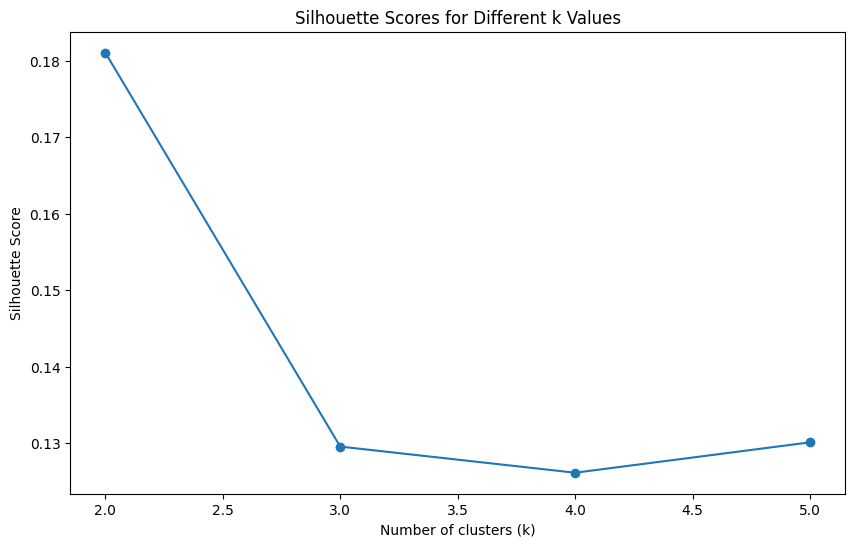

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to evaluate and plot silhouette scores for different k values
def evaluate_k_means(data, k_values, n_init=50, random_state=42):
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        print(f'For n_clusters = {k}, Silhouette Score = {score}')

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different k Values')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()

# Define range of k values to evaluate
k_values = range(2, 6)

# Evaluate k-means clustering
evaluate_k_means(clustering_data, k_values)



In [ ]:
# Get the cluster centers
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns=clustering_data.columns)

print("\nCluster Centers:")
print(centers_df)



Cluster Centers:
   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0         -0.124821            0.074534       -0.283150        -0.283080   
1         -0.493989           -1.084364       -0.405609        -0.419612   
2          0.101573            0.653746       -0.439452         0.037352   
3          1.747294            0.868241        1.087644         1.752257   
4         -0.307474           -0.224819        1.877981         0.189714   
5         -0.565761           -0.485532       -0.080871        -0.558479   
6         -0.020726            0.059744       -0.171299         0.187226   
7          0.189131            0.184523       -0.246129         0.199210   
8         -0.002749           -0.014285       -0.224957        -0.113821   
9         -0.148754           -0.061326       -0.288018        -0.023839   

   number_outpatient  number_emergency  number_inpatient    diag_1    diag_2  \
0          -0.161802         -0.118401         -0.185763 -0.00073

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
# Perform K-Means clustering with the optimal number of clusters (K=2) since it had the highest sillhoette score
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, random_state=42)
kmeans.fit(clustering_data)

# Add the cluster labels to the clustering_data DataFrame
clustering_data['Cluster'] = kmeans.labels_

# Calculate the mean values for each feature (including one-hot encoded categorical features) within each cluster
cluster_means = clustering_data.groupby('Cluster').mean()

print("\nMean values for each feature within each cluster:")
print(cluster_means)

# Calculate the silhouette score
silhouette_avg = silhouette_score(clustering_data.drop(columns=['Cluster']), kmeans.labels_)
print(f"\nSilhouette Score for K={optimal_clusters}: {silhouette_avg}")

# Optional: Save the clustering results
clustering_data.to_csv('clustering_results.csv', index=False)




Mean values for each feature within each cluster:
         time_in_hospital  num_lab_procedures  num_procedures  \
Cluster                                                         
0               -0.332139           -0.236397       -0.115492   
1                0.178380            0.126960        0.062027   

         num_medications  number_outpatient  number_emergency  \
Cluster                                                         
0              -0.386925          -0.126819         -0.079964   
1               0.207804           0.068110          0.042946   

         number_inpatient    diag_1    diag_2    diag_3  ...  \
Cluster                                                  ...   
0               -0.150618  0.020951 -0.215357 -0.264754  ...   
1                0.080892 -0.011252  0.115661  0.142190  ...   

         admission_source_id_20  admission_source_id_22  \
Cluster                                                   
0                      0.000562                0.000

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Perform K-Means clustering with the optimal number of clusters (K=4)
optimal_clusters = 4  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, random_state=42)
kmeans.fit(clustering_data)

# Add the cluster labels to the clustering_data DataFrame
clustering_data['Cluster'] = kmeans.labels_

# Calculate the mean values for each feature (including one-hot encoded categorical features) within each cluster
cluster_means = clustering_data.groupby('Cluster').mean()

print("\nMean values for each feature within each cluster:")
print(cluster_means)

# Calculate the silhouette score
silhouette_avg = silhouette_score(clustering_data.drop(columns=['Cluster']), kmeans.labels_)
print(f"\nSilhouette Score for K={optimal_clusters}: {silhouette_avg}")

# Optional: Save the clustering results
clustering_data.to_csv('clustering_results.csv', index=False)


Mean values for each feature within each cluster:
         time_in_hospital  num_lab_procedures  num_procedures  \
Cluster                                                         
0                1.188584            0.702316        0.788902   
1               -0.339837           -0.196827       -0.262453   
2               -0.319039           -0.208386       -0.108835   
3                0.055019            0.116061       -0.248414   

         num_medications  number_outpatient  number_emergency  \
Cluster                                                         
0               1.106119          -0.097712         -0.085151   
1              -0.274204          -0.071718         -0.079213   
2              -0.387190          -0.144489         -0.115751   
3               0.213187           1.927709          1.770374   

         number_inpatient    diag_1    diag_2    diag_3  ...  \
Cluster                                                  ...   
0               -0.052875 -0.184521  0.

In [ ]:
# Calculate the mean values for each feature (including one-hot encoded categorical features) within each cluster
cluster_means = clustering_data.groupby('Cluster').mean()

print("\nMean values for each feature within each cluster:")
display(cluster_means)

clustering_data.to_csv('clustering_results.csv', index=False)



Mean values for each feature within each cluster:


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.188584,0.702316,0.788902,1.106119,-0.097712,-0.085151,-0.052875,-0.184521,0.245164,0.308356,...,0.002773,0.000382,0.000096,0.002056,0.051630,0.013386,0.006693,0.562673,0.000143,0.000143
1,-0.339837,-0.196827,-0.262453,-0.274204,-0.071718,-0.079213,-0.123027,0.089893,0.020994,0.017894,...,0.001865,0.000044,0.000000,0.001163,0.022838,0.009434,0.005046,0.617670,0.000110,0.000066
2,-0.319039,-0.208386,-0.108835,-0.387190,-0.144489,-0.115751,-0.189744,0.009810,-0.211165,-0.255412,...,0.000562,0.000033,0.000000,0.002910,0.033395,0.003505,0.061830,0.466373,0.000231,0.003935
3,0.055019,0.116061,-0.248414,0.213187,1.927709,1.770374,2.479069,-0.106375,0.059963,0.091354,...,0.000199,0.000199,0.000000,0.000597,0.011149,0.007764,0.004778,0.689827,0.000199,0.000000


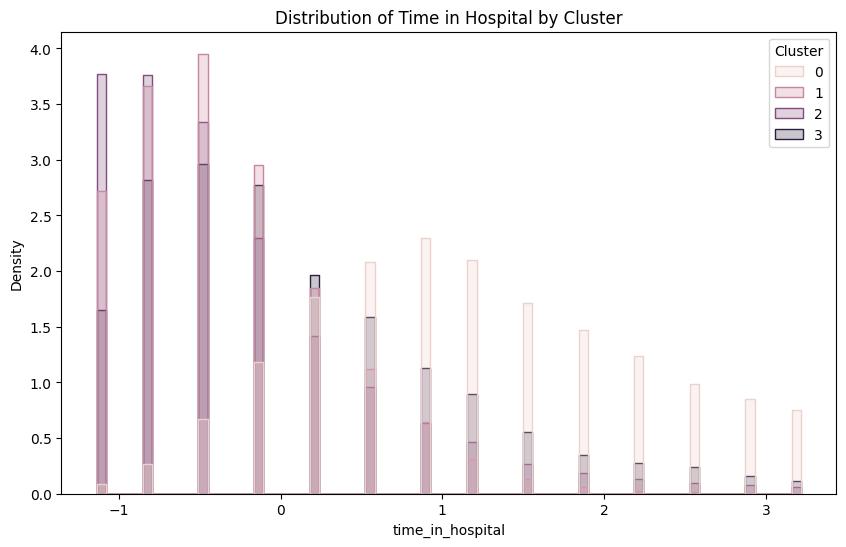

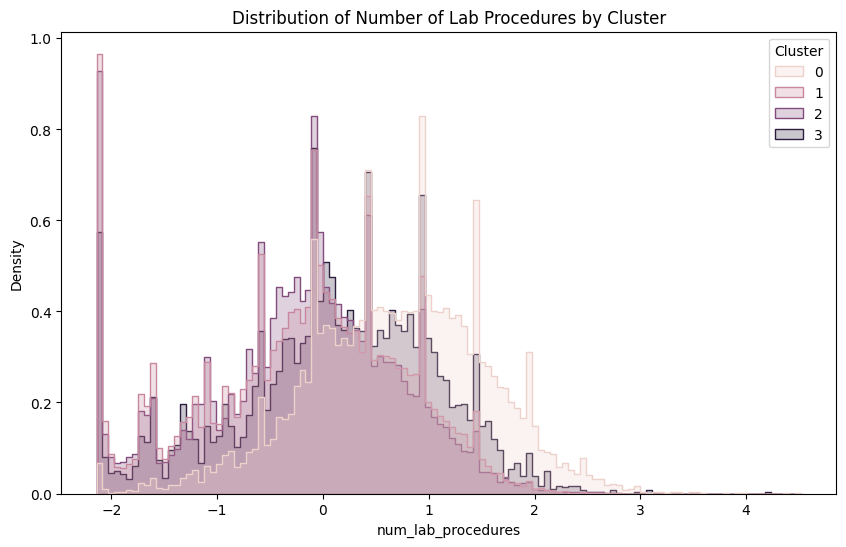

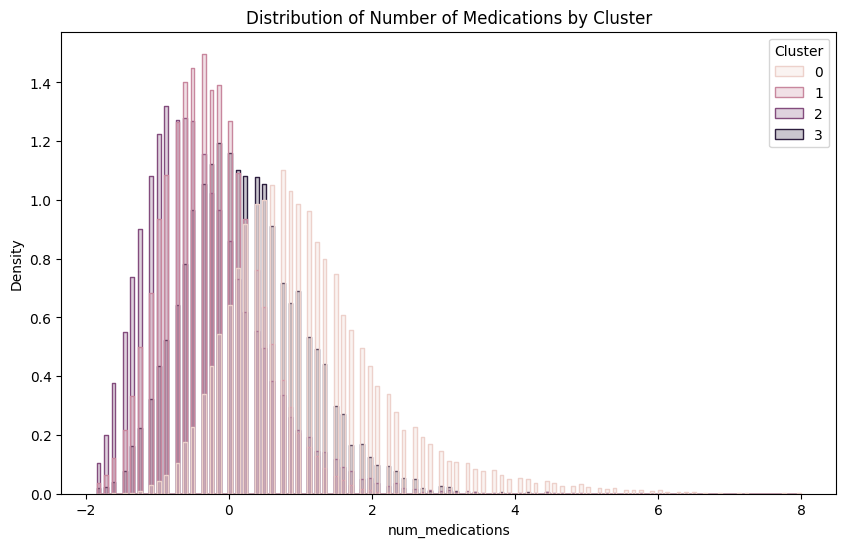

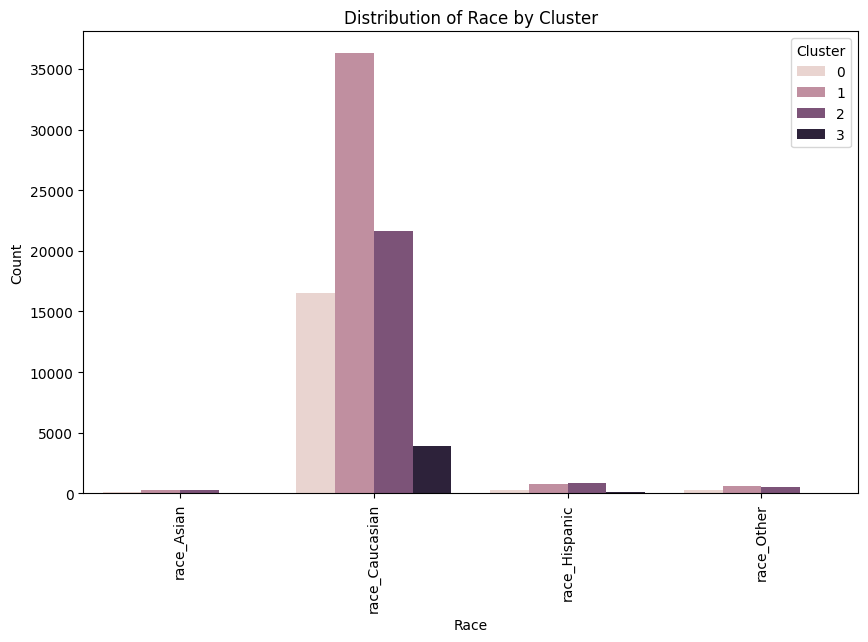

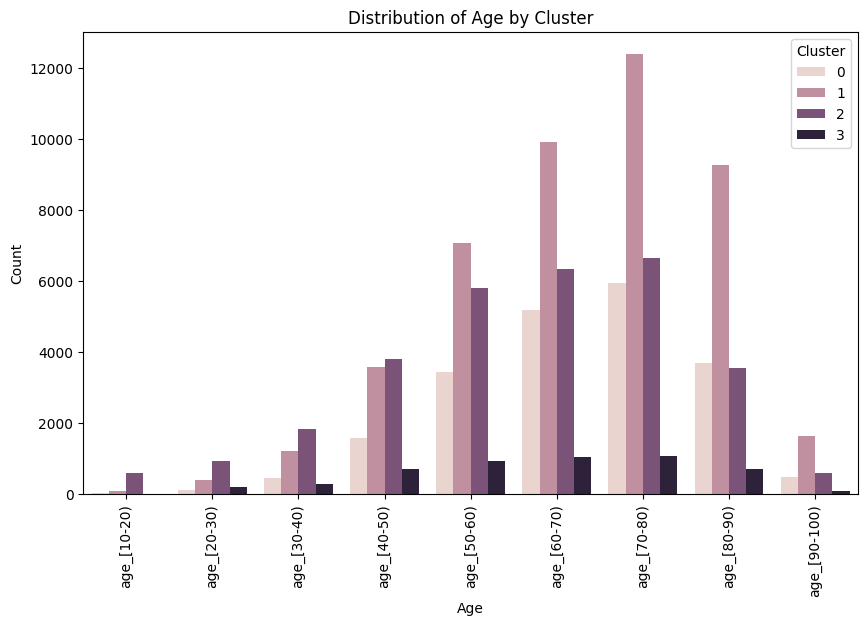

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the Cluster column is present in clustering_data
clustering_data['Cluster'] = kmeans.labels_

# Visualize the distribution of 'time_in_hospital' by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=clustering_data, x='time_in_hospital', hue='Cluster', element='step', stat='density', common_norm=False)
plt.title('Distribution of Time in Hospital by Cluster')
plt.show()

# Visualize the distribution of 'num_lab_procedures' by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=clustering_data, x='num_lab_procedures', hue='Cluster', element='step', stat='density', common_norm=False)
plt.title('Distribution of Number of Lab Procedures by Cluster')
plt.show()

# Visualize the distribution of 'num_medications' by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=clustering_data, x='num_medications', hue='Cluster', element='step', stat='density', common_norm=False)
plt.title('Distribution of Number of Medications by Cluster')
plt.show()

# Sum the one-hot encoded 'race' columns by cluster
race_columns = [col for col in clustering_data.columns if col.startswith('race_')]
race_distribution = clustering_data.groupby('Cluster')[race_columns].sum()

# Convert to long format for easier plotting
race_distribution = race_distribution.reset_index().melt(id_vars='Cluster', var_name='Race', value_name='Count')

# Visualize the distribution of 'race' by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=race_distribution, x='Race', y='Count', hue='Cluster')
plt.title('Distribution of Race by Cluster')
plt.xticks(rotation=90)
plt.show()

# Sum the one-hot encoded 'age' columns by cluster
age_columns = [col for col in clustering_data.columns if col.startswith('age_')]
age_distribution = clustering_data.groupby('Cluster')[age_columns].sum()

# Convert to long format for easier plotting
age_distribution = age_distribution.reset_index().melt(id_vars='Cluster', var_name='Age', value_name='Count')

# Visualize the distribution of 'age' by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=age_distribution, x='Age', y='Count', hue='Cluster')
plt.title('Distribution of Age by Cluster')
plt.xticks(rotation=90)
plt.show()



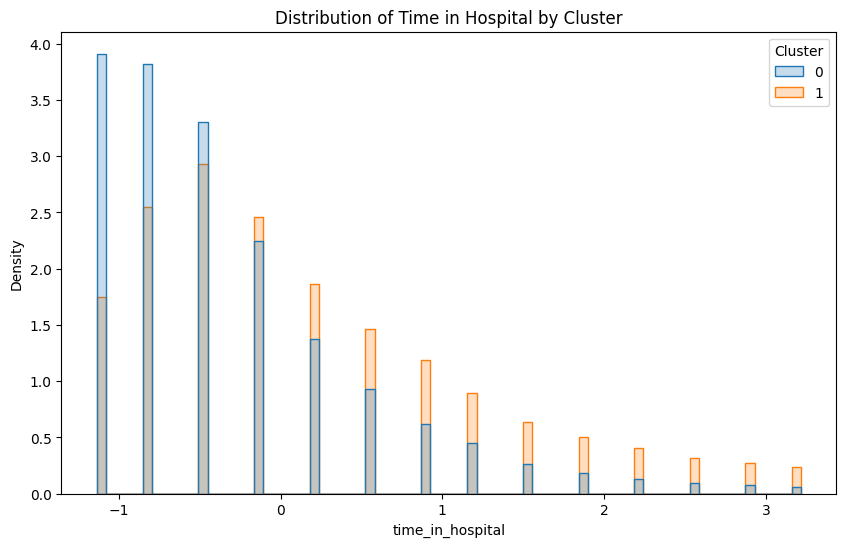

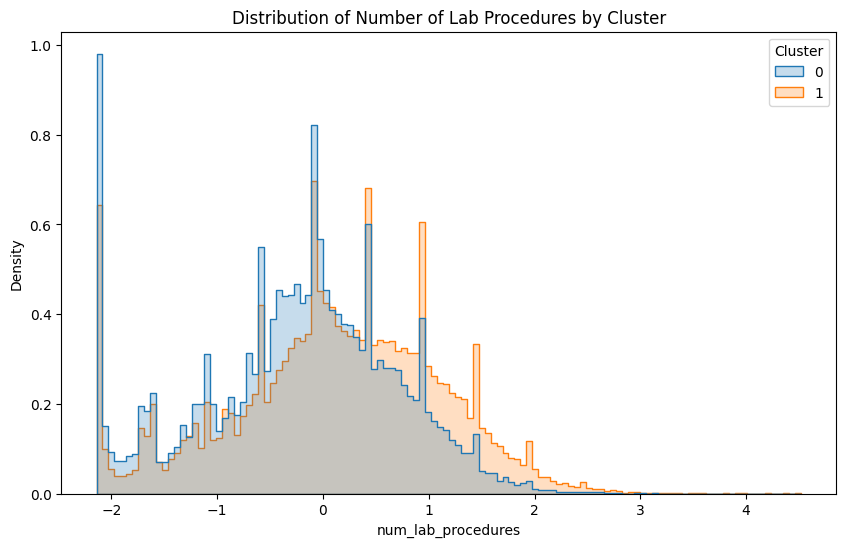

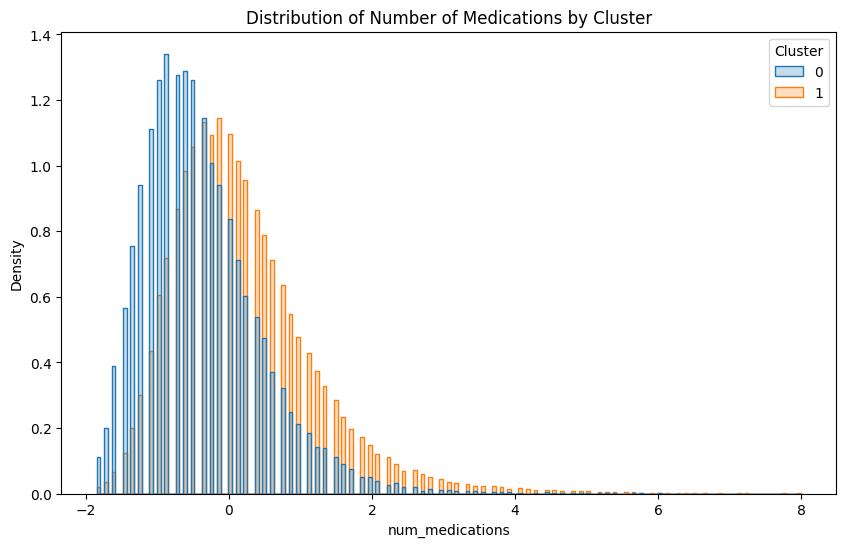

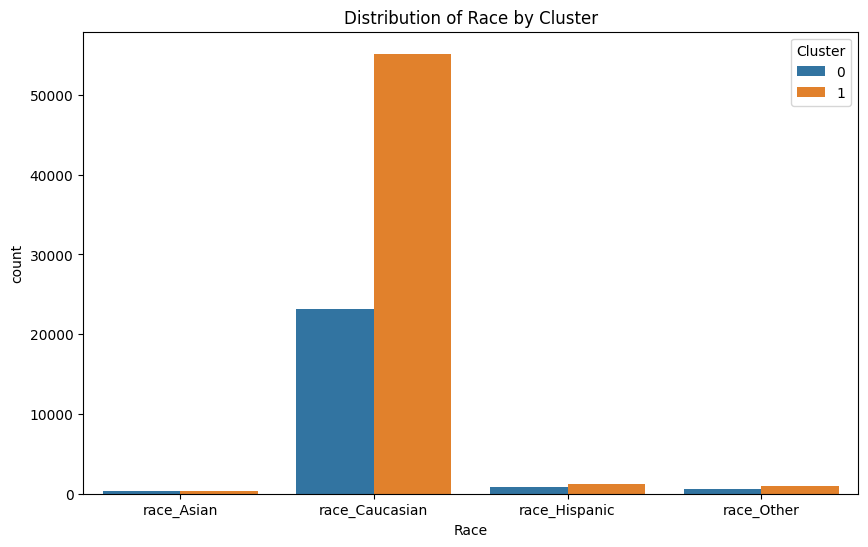

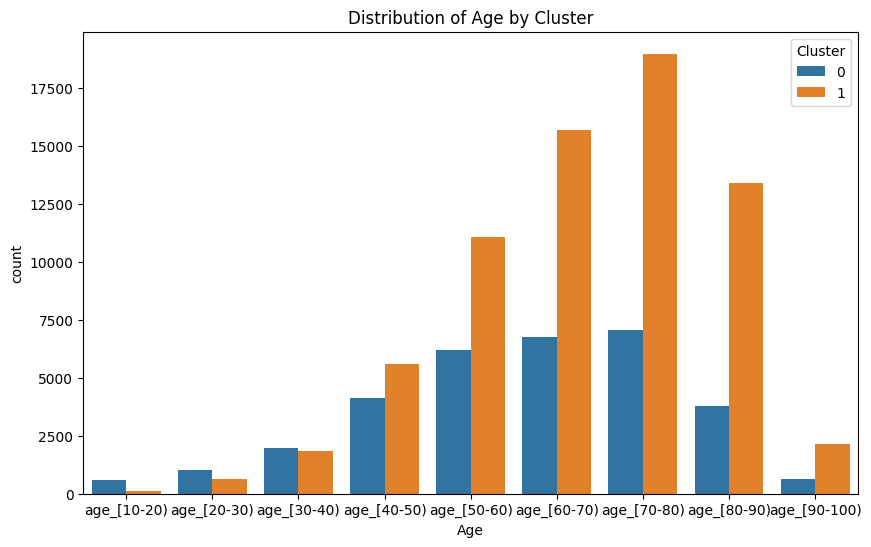

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Perform K-Means clustering with K=2
kmeans = KMeans(n_clusters=2, n_init=50, random_state=42)
kmeans.fit(clustering_data)

# Add the cluster labels to the DataFrame
clustering_data['Cluster'] = kmeans.labels_

# Visualize the distribution of 'time_in_hospital' by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=clustering_data, x='time_in_hospital', hue='Cluster', element='step', stat='density', common_norm=False)
plt.title('Distribution of Time in Hospital by Cluster')
plt.show()

# Visualize the distribution of 'num_lab_procedures' by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=clustering_data, x='num_lab_procedures', hue='Cluster', element='step', stat='density', common_norm=False)
plt.title('Distribution of Number of Lab Procedures by Cluster')
plt.show()

# Visualize the distribution of 'num_medications' by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=clustering_data, x='num_medications', hue='Cluster', element='step', stat='density', common_norm=False)
plt.title('Distribution of Number of Medications by Cluster')
plt.show()

# Visualize the distribution of 'race' by cluster
plt.figure(figsize=(10, 6))
race_columns = ['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other']
race_data = clustering_data.melt(id_vars='Cluster', value_vars=race_columns, var_name='Race', value_name='Count')
race_data = race_data[race_data['Count'] == 1]
sns.countplot(data=race_data, x='Race', hue='Cluster')
plt.title('Distribution of Race by Cluster')
plt.show()

# Visualize the distribution of 'age' by cluster
plt.figure(figsize=(10, 6))
age_columns = ['age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)']
age_data = clustering_data.melt(id_vars='Cluster', value_vars=age_columns, var_name='Age', value_name='Count')
age_data = age_data[age_data['Count'] == 1]
sns.countplot(data=age_data, x='Age', hue='Cluster')
plt.title('Distribution of Age by Cluster')
plt.show()
